# Lending Club Case Study [Data Analysis]

###  <span style="color:blue">Problem statement</span>

- To understand the driving factors behind loan default for a Consumer Finance Company for its portfolio and risk assessment.

### <span style="color:blue">Business Understanding:</span>

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


### <span style="color:blue"> Loan Outcome Categories: </span>
When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:
    - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan.


2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)





# Implementation



## <span style="color:blue">Strategy:</span>
1. Problem Statement
3. Data Cleaning:
	- Null/Missing values
	- Invalid values
    - Analyse and drop unmatched behavioral fields 
	- Data filtering
	- Imputing rows
	- Outliers
4. Univariate Analysis
5. Bivariate Analysis
6. Derived Metrics
7. Conclusion 

#### Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore') # to ignore the warnings

## <span style="color:blue">Data Sourcing: </span>

In [73]:
loan = pd.read_csv("loan.csv", sep=",", low_memory=False)

##  <span style="color:blue"> Data Summary: </span>

### <span style="color:purple"> Understand Data Volume: </span>

In [223]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38359 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38359 non-null  int64         
 1   loan_amnt               38359 non-null  int64         
 2   funded_amnt             38359 non-null  int64         
 3   funded_amnt_inv         38359 non-null  float64       
 4   term                    38359 non-null  object        
 5   int_rate                38359 non-null  float64       
 6   installment             38359 non-null  float64       
 7   grade                   38359 non-null  object        
 8   sub_grade               38359 non-null  object        
 9   emp_length              37329 non-null  object        
 10  home_ownership          38359 non-null  object        
 11  annual_inc              38359 non-null  float64       
 12  verification_status     38359 non-null  object

In [75]:
loan.shape

(39717, 111)

-  <span style="color:#1560bd">Total intial columns in dataset: **39717** </span>
-  <span style="color:#1560bd">Total initial rows in dataset: **111** </span>

In [76]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

###  <span style="color:purple">Analyse Total null values: </span>

<span style="color:#1560bd"> **Count** of null values </span>

In [77]:
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

<span style="color:#1560bd"> **Percentage** of null values: Only show which has **above 20% null values** </span>

In [78]:
null_percentage = (loan.isnull().sum() / len(loan)) * 100
sorted_null_percentage = null_percentage[null_percentage > 20].sort_values(ascending=False) 
sorted_null_percentage

mo_sin_old_il_acct                100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts                     100.000000
num_rev_tl_bal_gt_0               100.000000
num_sats                          100.000000
num_tl_120dpd_2m                  100.000000
num_tl_30dpd                      100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_op_past_12m                100.000000
pct_tl_nvr

-  <span style="color:#1560bd">This shows there are plenty of columns with **100% null values**. </span>

 ### <span style="color:purple">Verify Header & Footer </span>

In [79]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


- <span style="color:#1560bd"> There is NO header rows found.</span>

In [80]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- <span style="color:#1560bd"> There is NO footer columns found. </span>

##  <span style="color:blue"> Drop Columns </span>

### <span style="color:purple"> Drop columns with 100% of null values as identified above ! </span>

In [81]:
temp_full_null_c = null_percentage[null_percentage == 100]
temp_full_null_c

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


In [82]:
len(temp_full_null_c)

54

- <span style="color:#1560bd"> There are **total 54 columns with all values are null**. These columns can be removed from loan dataset. </span>

In [83]:
# Random check on any of the abpve column if contains any value
loan["open_rv_12m"].value_counts()

Series([], Name: open_rv_12m, dtype: int64)

In [84]:
# Drop these columns
full_null_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) == 100]
full_null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [85]:
loan = loan.drop(full_null_columns, axis=1)
loan.shape

(39717, 57)

- <span style="color:#1560bd"> There are total **54 fully null columns** removed from dataset. </span>
- <span style="color:#1560bd"> Remaining are **57 columns** in the dataset. </span>

### <span style="color:purple"> Description columns can be removed as this will not influence the EDA process.   </span>

- <span style="color:#1560bd"> desc </span>
- <span style="color:#1560bd"> title </span>

In [86]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [87]:
loan["title"].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [88]:
loan["desc"].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

- <span style="color:#1560bd"> Drop below columns. </span>
    - <span style="color:#1560bd"> title </span>
    - <span style="color:#1560bd"> desc </span>

<span style="color:#1560bd">***Note:**
As the focus is on quantifiable and historical data, this column might not provide significant value and could be dropped.* </span>

In [89]:
loan = loan.drop(["title", "desc"], axis=1)
loan.shape

(39717, 55)

- <span style="color:#1560bd"> 2 columns removed. **55 columns left**.  </span>

### <span style="color:purple"> Drop irrelevent columns: </span>
-  *<span style="color:#1560bd"> Example columns with data which is not helpful in predicting defaulters, columns with only having 1 value across all columns, etc. </span>*

<span style="color:#1560bd"> **next_pymnt_d:** This column contains information about the next scheduled payment date, which is a future event. Since the analysis is focused on historical data up to 2011, this column may not be relevant and could be dropped. </span>

In [90]:
loan = loan.drop(["next_pymnt_d"], axis=1)
loan.shape

(39717, 54)

<span style="color:#1560bd"> Identify **columns which has ONLY 1 value across all rows**. </span>

In [91]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [92]:
print(loan["pymnt_plan"].value_counts())
print()
print(loan["tax_liens"].value_counts())
print()
print(loan["chargeoff_within_12_mths"].value_counts())
print()
print(loan["application_type"].value_counts())
print()
print(loan["policy_code"].value_counts())
print()
print(loan["initial_list_status"].value_counts())
print()
print(loan["collections_12_mths_ex_med"].value_counts())
print()

n    39717
Name: pymnt_plan, dtype: int64

0.0    39678
Name: tax_liens, dtype: int64

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

INDIVIDUAL    39717
Name: application_type, dtype: int64

1    39717
Name: policy_code, dtype: int64

f    39717
Name: initial_list_status, dtype: int64

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64



#### <span style="color:#1560bd"> **Post analysis** </span>
<span style="color:#1560bd"> **Drop columns which has only 1 value across all rows** </span>
- <span style="color:#1560bd"> These columns has only one value across all rows, it is essentially a constant column and does not provide any information for analysis. And cannot be used significatly in predicting the loan default. So can be dropped.  </span>

In [93]:
cols_with_only1value = loan.columns[loan.nunique() ==  1]
cols_with_only1value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [94]:
loan = loan.drop(cols_with_only1value, axis=1)
loan.shape

(39717, 45)

In [95]:
- <span style="color:#1560bd"> **Remaining columns: 45** </span>

SyntaxError: invalid syntax (544104880.py, line 1)

#### <span style="color:#1560bd"> **Note:** </span>

<span style="color:#1560bd"> **Let's do a further analysis on the data columns to narrow down to the actual influncial columns which would help in achieving the target (predicting defaults from requests/applications).** </span>

<span style="color:#1560bd"> For this, let's find out the **behavioral columns** which would NOT influence the outcome and **see if that can be dropped**. </span>

### <span style="color:purple"> Analyse the behavioural columns: </span>

- <span style="color:#1560bd">**zip_code** - (not very relevent for influencing the outcome) </span>
- <span style="color:#1560bd">**url** - (unique in nature, so can be dropped) </span>
- <span style="color:#1560bd">**member_id** - (unique in nature, so can be dropped) </span>
- <span style="color:#1560bd"> **collection_recovery_fee** -(Not relevent) </span>
- <span style="color:#1560bd">**emp_title** -  (textual informations - unique in nature, so can be dropped) </span>
- <span style="color:#1560bd"> **collection_recovery_fee** -(Not relevent) </span>
- <span style="color:#1560bd"> **out_prncp_inv** -(Not relevent) </span>
- <span style="color:#1560bd"> **recoveries** -(Not relevent) </span>
- <span style="color:#1560bd"> **last_pymnt_d** -(Not relevent) </span>
- <span style="color:#1560bd"> **last_pymnt_amnt** -(Not relevent) </span>
- <span style="color:#1560bd"> **last_credit_pull_d** -(Not relevent) </span>
  


In [96]:
col_to_be_removed = [ 
    "zip_code", 
    "url", 
    "member_id",
    "emp_title", 
    "out_prncp",
    "out_prncp_inv",
    "recoveries",
    "collection_recovery_fee",
    "last_pymnt_d",
    "last_pymnt_amnt",
    "last_credit_pull_d"
]
loan = loan.drop(col_to_be_removed, axis=1)
loan.shape

(39717, 34)

- <span style="color:#1560bd"> After optimizing the columns, there are total of **34 columns left**. </span>

##  <span style="color:blue"> Data Type conversion: </span>

In [97]:
loan.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
total_pymnt               float64
total_pymnt_in

In [98]:
loan["total_pymnt"]

0         5863.155187
1         1008.710000
2         3005.666844
3        12231.890000
4         3513.330000
             ...     
39712     2822.969293
39713     9913.491822
39714     5272.161128
39715     5174.198551
39716     9195.263334
Name: total_pymnt, Length: 39717, dtype: float64

### <span style="color:purple"> Round float variables to max 2 decimal points: </span>

In [99]:
float_columns = loan.select_dtypes(include='float64').columns

for f_col in float_columns:
    loan[f_col] = loan[f_col].round(2)
    
loan.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
mths_since_last_record    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc                   int64
total_pymnt               float64
total_pymnt_in

In [100]:
# Verify the change
loan["total_pymnt"]

0         5863.16
1         1008.71
2         3005.67
3        12231.89
4         3513.33
           ...   
39712     2822.97
39713     9913.49
39714     5272.16
39715     5174.20
39716     9195.26
Name: total_pymnt, Length: 39717, dtype: float64

### <span style="color:purple"> Convert the date columns: </span>

In [101]:
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.loc[:,['earliest_cr_line', 'issue_d']]


,earliest_cr_line,issue_d
0,1985-01-01,2011-12-01
1,1999-04-01,2011-12-01
2,2001-11-01,2011-12-01
3,1996-02-01,2011-12-01
4,1996-01-01,2011-12-01
...,...,...
39712,1990-11-01,2007-07-01
39713,1986-12-01,2007-07-01
39714,1998-10-01,2007-07-01
39715,1988-11-01,2007-07-01


### <span style="color:purple"> Formatting other column types: </span>

- <span style="color:#1560bd">  **int_rate**: Remove % symbol and convert to float </span>
- <span style="color:#1560bd">  **revol_util**: Remove % symbol and convert to float </span>


In [102]:
loan["int_rate"] = round(loan["int_rate"].replace("%","", regex=True).astype(float), 2)
loan["revol_util"] = round(loan["revol_util"].replace("%","", regex=True).astype(float), 2)
loan.loc[:,["revol_util", "int_rate"]]

,revol_util,int_rate
0,83.7,10.65
1,9.4,15.27
2,98.5,15.96
3,21.0,13.49
4,53.9,12.69
...,...,...
39712,13.1,8.07
39713,26.9,10.28
39714,19.4,8.07
39715,0.7,7.43


In [103]:
loan.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
mths_since_last_delinq           float64
mths_since_last_record           float64
open_acc                           int64
pub_rec         

- <span style="color:#1560bd"> All data types looks good now. </span>

##  <span style="color:blue"> Dropping/ Imputing the rows: </span>

### <span style="color:purple"> Analyse rows with maximum null values: </span>

In [104]:
loan.isnull().sum(axis=1).sort_values(ascending=False)

24984    4
11282    4
4714     4
32418    3
1016     3
        ..
7014     0
13403    0
38738    0
38736    0
12297    0
Length: 39717, dtype: int64

### <span style="color:purple"> Check if any Duplicate Rows: </span>

In [105]:
duplicate_rows = loan[loan.duplicated()]
duplicate_rows

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,pub_rec_bankruptcies


<span style="color:#1560bd"> There are **NO DIPLICATE** rows present. </span>

### <span style="color:purple"> Analyse: Loan Status = "Current": </span>

- <span style="color:#1560bd">Loan status of type **Current** are currently **in progress** neither fully paid nor defaulted. </span>
- <span style="color:#1560bd">This value of records are not the right data to find the defaulters. </span>
- <span style="color:#1560bd">So, these rows can be **dropped**. </span>

In [106]:
len(loan[loan["loan_status"] == "Current"])

1140

<span style="color:#1560bd"> There are total of **1140** records with **Loan status** as **Current**. Let's **drop** this. </span>

In [107]:
loan = loan[loan["loan_status"] != "Current"]
loan.shape

(38577, 34)

- <span style="color:#1560bd"> Check null values on key columns. </span>

In [108]:
print("id : ", loan["id"].isnull().sum())
print("loan_amnt : ", loan["loan_amnt"].isnull().sum())
print("funded_amnt : ", loan["funded_amnt"].isnull().sum())
print("term : ", loan["term"].isnull().sum())
print("int_rate : ", loan["int_rate"].isnull().sum())
print("installment : ", loan["installment"].isnull().sum())
print("grade : ", loan["grade"].isnull().sum())
print("annual_inc : ", loan["annual_inc"].isnull().sum())
print("loan_status : ", loan["loan_status"].isnull().sum())
print("verification_status : ", loan["verification_status"].isnull().sum())
print("issue_d : ", loan["issue_d"].isnull().sum())
print("emp_length : ", loan["emp_length"].isnull().sum())


id :  0
loan_amnt :  0
funded_amnt :  0
term :  0
int_rate :  0
installment :  0
grade :  0
annual_inc :  0
loan_status :  0
verification_status :  0
issue_d :  0
emp_length :  1033


- <span style="color:#1560bd"> Target variable in our analysis is **"Loan Status"** </spam>

In [109]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

##  <span style="color:blue"> Derived Columns: </span>

- <span style="color:#1560bd"> **Year** & **Month** from **'issue_d'** column. </span>

In [110]:
loan["issue_year"] = pd.to_datetime(loan["issue_d"], dayfirst=True).dt.year
loan["issue_month"] = pd.to_datetime(loan["issue_d"], dayfirst=True).dt.month
loan.loc[:,["issue_year", "issue_month"]]

,issue_year,issue_month
0,2011,12
1,2011,12
2,2011,12
3,2011,12
5,2011,12
...,...,...
39712,2007,7
39713,2007,7
39714,2007,7
39715,2007,7


- <span style="color:#1560bd"> As done with some initial level of cleaning and formatting of the data. Quickly I can think of the following analysis while aiming at predicting the pattern for defaulters.  </span>

### <span style="color:purple">  Analyse: </span>

- <span style="color:#1560bd"> What is the range of loans applied?</span>
- <span style="color:#1560bd">Min, Avg, Max loan applied. </span>

- <span style="color:#1560bd">The annual income brackets of most who applied for loans. </span>
- <span style="color:#1560bd">Min, Avg, Max salary. </span>

- <span style="color:#1560bd">Most applicants interest rates bracket.</span>
- <span style="color:#1560bd">Min, Avg, Max interest rates. </span>

- <span style="color:#1560bd">What is the most preferable tenure for the applicants?</span>

- <span style="color:#1560bd">What is the min, max DTI?

In [111]:
##  <span style="color:blue"> Univariate Analysis </span>

<span style="color:#1560bd"> Create Data buckets on some of the key Numeric columns. </span>
- <span style="color:#1560bd"> annual_inc </span>
- <span style="color:#1560bd"> loan_amnt </span>
- <span style="color:#1560bd">int_rate </span>
- <span style="color:#1560bd"> dti </span>

In [112]:
<span style="color:#1560bd"> Bucket **annual_inc** </span>

SyntaxError: invalid syntax (534622181.py, line 1)

In [113]:
def calculate_edges(df, col):
    num_bins = 5 
    print("Min value : ", df[col].min())
    print("Max value : ", loan[col].max())
    
    print(np.linspace(df[col].min(), df[col].max(), num_bins + 1))
    

In [114]:
num_bins = 5  
print("Min value : ", loan["annual_inc"].min())
print("Max value : ", loan["annual_inc"].max())

# Plan the bucket Edges
bin_e = np.linspace(loan["annual_inc"].min(), loan["annual_inc"].max(), num_bins + 1)
# bin_edges_ai -> array([4.0000e+03, 1.2032e+06, 2.4024e+06, 3.6016e+06, 4.8008e+06,6.0000e+06])

formatted_bin_edges = [f"{int(val/1000)}k" for val in bin_e]
formatted_bin_edges


Min value :  4000.0
Max value :  6000000.0


['4k', '1203k', '2402k', '3601k', '4800k', '6000k']

In [115]:
bin_edges_ai = [4000, 1200000, 2400000, 3600000, 4800000, 6000000] # CLosest round off
bin_labels_ai = ['4k-1200k', '1200k-2400k', '2400k-3600k', '3600k-4800k', '4800k-6000k']
loan['annual_inc_brkt'] = pd.cut(loan['annual_inc'], bins=bin_edges_ai, labels=bin_labels_ai)
loan.loc[:, ["annual_inc", "annual_inc_brkt"]]

,annual_inc,annual_inc_brkt
0,24000.0,4k-1200k
1,30000.0,4k-1200k
2,12252.0,4k-1200k
3,49200.0,4k-1200k
5,36000.0,4k-1200k
...,...,...
39712,110000.0,4k-1200k
39713,18000.0,4k-1200k
39714,100000.0,4k-1200k
39715,200000.0,4k-1200k


In [116]:
loan["annual_inc_brkt"].value_counts()

4k-1200k       38568
1200k-2400k        6
3600k-4800k        1
4800k-6000k        1
2400k-3600k        0
Name: annual_inc_brkt, dtype: int64

In [117]:
<span style="color:#1560bd"> Lets see all columns now after adding Derived columns -  </span>

SyntaxError: invalid syntax (3743467894.py, line 1)

In [118]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      38577 non-null  int64         
 1   loan_amnt               38577 non-null  int64         
 2   funded_amnt             38577 non-null  int64         
 3   funded_amnt_inv         38577 non-null  float64       
 4   term                    38577 non-null  object        
 5   int_rate                38577 non-null  float64       
 6   installment             38577 non-null  float64       
 7   grade                   38577 non-null  object        
 8   sub_grade               38577 non-null  object        
 9   emp_length              37544 non-null  object        
 10  home_ownership          38577 non-null  object        
 11  annual_inc              38577 non-null  float64       
 12  verification_status     38577 non-null  object

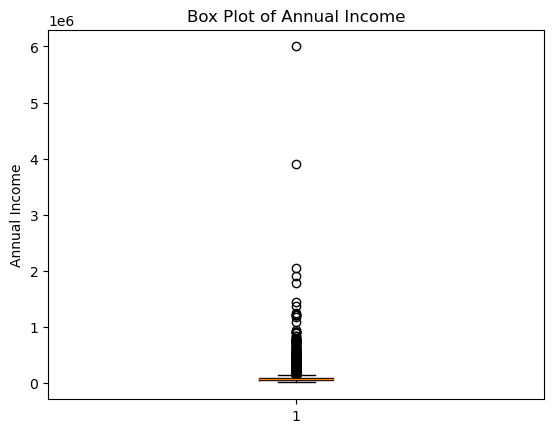

In [119]:
plt.boxplot(loan['annual_inc'])
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income')
plt.show()

- <span style="color:#1560bd"> The above boxplot clearly states that **Annual Income** column has lot of outliers. </span>
- <span style="color:#1560bd"> So, this outliers can be **analysed seperately**. </span>

In [120]:
loan.shape

(38577, 37)

In [121]:
loan = loan[loan['annual_inc'] < 300000]
loan.shape

(38359, 37)

In [122]:
- There are outliers for annual income field. 171 borrowers have annual income above 300k. This number is very less and can wrongly incluence the outcome. So dropped. 

SyntaxError: invalid decimal literal (3108757840.py, line 1)

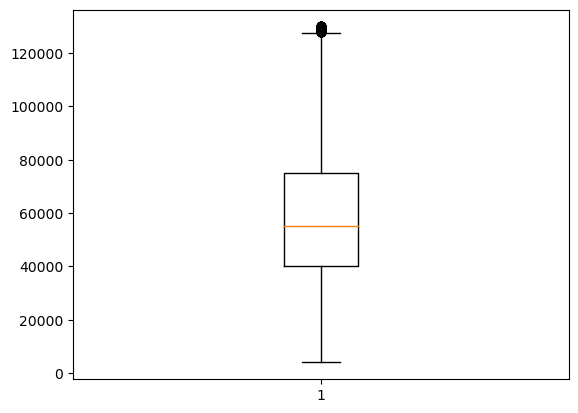

In [123]:
temp_df = loan[loan['annual_inc'] < 130000]
plt.boxplot(temp_df['annual_inc'])
plt.show()

In [124]:
loan_Income_above_130k = loan[loan['annual_inc'] > 130000 ]
loan_Income_above_130k.shape

(2204, 37)

- <span style="color:#1560bd"> By looking into the above box plot, it looks obvious to **analyse annual income 130K seperately** as there are few numbers above this range compare to the full dataset, which may wrongly influcnce the outcome. </span>

In [125]:
loan_inc_less_130K = loan[loan['annual_inc'] <= 130000 ]
loan_inc_less_130K.shape

(36155, 37)

#### - <span style="color:#1560bd"> **2422** applicants with annual income **greater 130k**. </span>
#### - <span style="color:#1560bd"> **36155** applicants with annual income **less 130k**. </span>

<span style="color:#1560bd"> Bucket **loan_amnt** </span>

In [126]:
calculate_edges(loan, "loan_amnt")

Min value :  500
Max value :  35000
[  500.  7400. 14300. 21200. 28100. 35000.]


In [127]:
bin_edges_la = [500,  7500., 15000., 22000., 28000., 35000.] # CLosest round off
bin_labels_la = ['500-7.5K', '7.5k-15k', '15k-22k', '22k-28k', '28k-35k']
loan['loan_amnt_brkt'] = pd.cut(loan['loan_amnt'], bins=bin_edges_la, labels=bin_labels_la)
loan.loc[:, ["loan_amnt", "loan_amnt_brkt"]]

,loan_amnt,loan_amnt_brkt
0,5000,500-7.5K
1,2500,500-7.5K
2,2400,500-7.5K
3,10000,7.5k-15k
5,5000,500-7.5K
...,...,...
39712,2500,500-7.5K
39713,8500,7.5k-15k
39714,5000,500-7.5K
39715,5000,500-7.5K


In [128]:
loan["loan_amnt_brkt"].value_counts()

500-7.5K    15285
7.5k-15k    14576
15k-22k      4939
22k-28k      2456
28k-35k      1098
Name: loan_amnt_brkt, dtype: int64

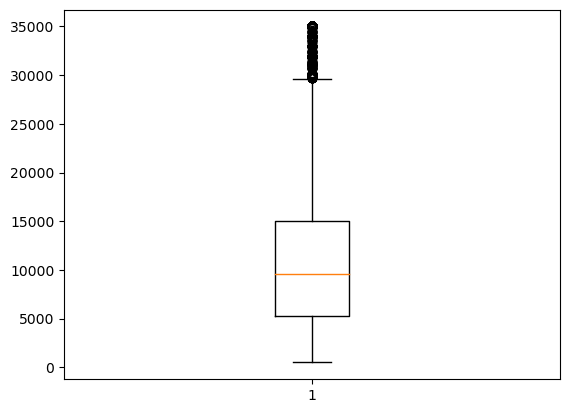

In [129]:
plt.boxplot(loan['loan_amnt'])
plt.show()

In [130]:
<span style="color:#1560bd"> Bucket **int_rate** </span>

SyntaxError: invalid syntax (1370461478.py, line 1)

In [131]:
calculate_edges(loan,"int_rate")

Min value :  5.42
Max value :  24.4
[ 5.42   9.216 13.012 16.808 20.604 24.4  ]


In [132]:
bin_edges_ir = [5, 10, 13, 16, 20, 25] # CLosest round off
bin_labels_ir = ['5-10', '10-13', '13-16', '16-20', '20-25'] 
loan['int_rate_brkt'] = pd.cut(loan['int_rate'], bins=bin_edges_ir, labels=bin_labels_ir)
loan.loc[:, ["int_rate", "int_rate_brkt"]]

,int_rate,int_rate_brkt
0,10.65,10-13
1,15.27,13-16
2,15.96,13-16
3,13.49,13-16
5,7.90,5-10
...,...,...
39712,8.07,5-10
39713,10.28,10-13
39714,8.07,5-10
39715,7.43,5-10


In [133]:
loan["int_rate_brkt"].value_counts()

5-10     12272
10-13    11621
13-16     9118
16-20     4596
20-25      752
Name: int_rate_brkt, dtype: int64

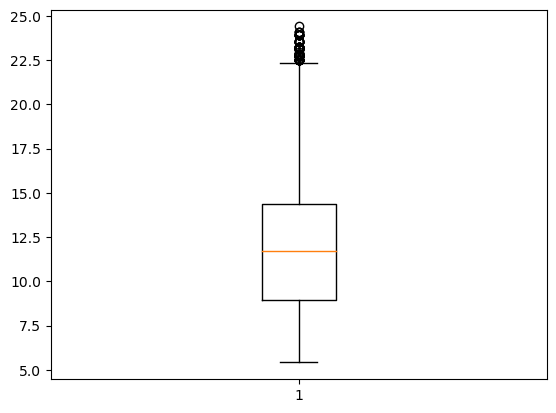

In [134]:
plt.boxplot(loan['int_rate'])
plt.show()

In [135]:
<span style="color:#1560bd"> Bucket **dti** </span>

SyntaxError: invalid syntax (2077573471.py, line 1)

In [136]:
calculate_edges(loan,"dti")

Min value :  0.0
Max value :  29.99
[ 0.     5.998 11.996 17.994 23.992 29.99 ]


In [137]:
bin_edges_dti = [0, 6, 12, 18, 24, 30] # CLosest round off
bin_labels_dti = ['0-6', '6-12', '12-18', '18-24', '24-30']
loan['dti_brkt'] = pd.cut(loan['dti'], bins=bin_edges_dti, labels=bin_labels_dti)
loan.loc[:, ["dti", "dti_brkt"]]

,dti,dti_brkt
0,27.65,24-30
1,1.00,0-6
2,8.72,6-12
3,20.00,18-24
5,11.20,6-12
...,...,...
39712,11.33,6-12
39713,6.40,6-12
39714,2.30,0-6
39715,3.72,0-6


In [138]:
loan["dti_brkt"].value_counts()

12-18    11324
6-12     10186
18-24     8890
0-6       6110
24-30     1673
Name: dti_brkt, dtype: int64

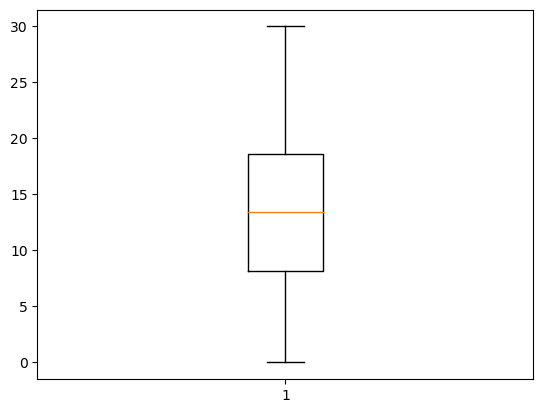

In [139]:
plt.boxplot(loan['dti'])
plt.show()

<span style="color:#1560bd"> Creating the actual names for the columns. As this values will be used in displaying in reports. </span>

In [140]:
loan_actual_names = {
  "id": "Loan ID",
  "loan_amnt": "Loan Amount",
  "funded_amnt": "Funded Amount",
  "funded_amnt_inv": "Funded Amount by Investors",
  "term": "Loan Term",
  "int_rate": "Interest Rate",
  "installment": "Monthly Installment",
  "grade": "Loan Grade",
  "sub_grade": "Loan Subgrade",
  "emp_length": "Employment Length",
  "home_ownership": "Home Ownership",
  "annual_inc": "Annual Income",
  "verification_status": "Income Verification Status",
  "issue_d": "Loan Issuance Date",
  "loan_status": "Loan Status",
  "purpose": "Loan Purpose",
  "addr_state": "State of Borrower",
  "dti": "Debt-to-Income Ratio",
  "delinq_2yrs": "Number of Delinquencies in the Last 2 Years",
  "earliest_cr_line": "Earliest Credit Line",
  "inq_last_6mths": "Inquiries in the Last 6 Months",
  "mths_since_last_delinq": "Months Since Last Delinquency",
  "mths_since_last_record": "Months Since Last Public Record",
  "open_acc": "Number of Open Credit Lines",
  "pub_rec": "Number of Public Records",
  "revol_bal": "Revolving Credit Balance",
  "revol_util": "Revolving Credit Utilization",
  "total_acc": "Total Number of Credit Lines",
  "total_pymnt": "Total Payments Received",
  "total_pymnt_inv": "Total Payments Received by Investors",
  "total_rec_prncp": "Total Principal Received",
  "total_rec_int": "Total Interest Received",
  "total_rec_late_fee": "Total Late Fees Received",
  "pub_rec_bankruptcies": "Number of Public Record Bankruptcies",
  "issue_year": "Loan Issuance Year",
  "issue_month": "Loan Issuance Month",
  "annual_inc_brkt": "Income Bracket",
  "loan_amnt_brkt": "Loan Amount Bracket",
  "int_rate_brkt": "Interest Rate Bracket",
  "dti_brkt": "Debt-to-Income Ratio Bracket"
}

### <span style="color:purple">**Loan Amount: Univeriate analysis**</span>

In [141]:
def Univeriate_plot (df, column):
    fig, p = plt.subplots(2,1, figsize=(8, 8))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(loan_actual_names[column])
    p[1].set_xlabel(loan_actual_names[column])
    p[0].set_title("Disribution plot", fontsize=14, fontweight='bold')
    p[1].set_title("Box Plot", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

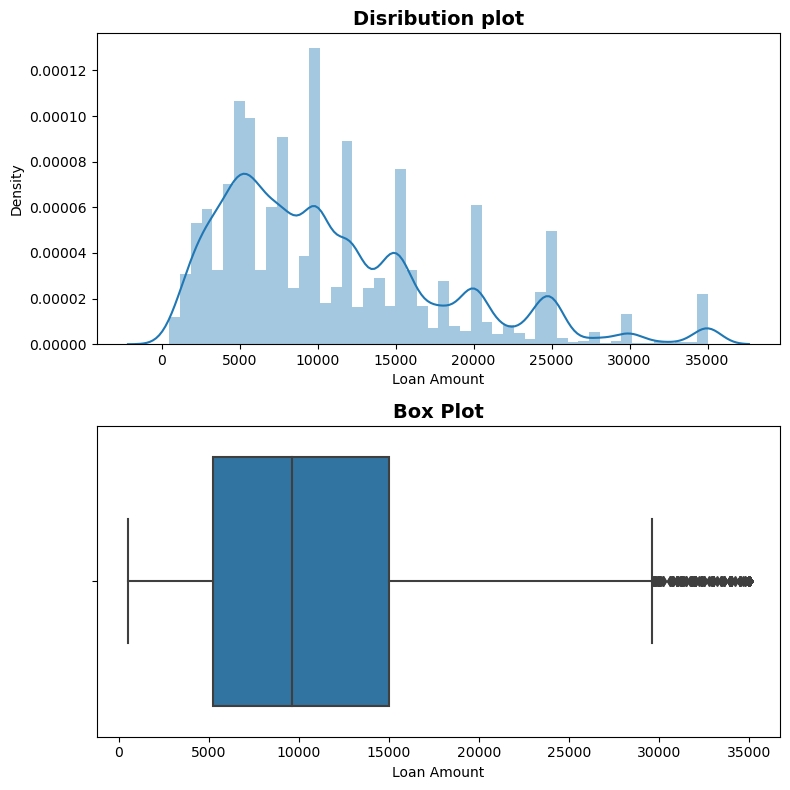

In [142]:
Univeriate_plot(loan, 'loan_amnt')

In [143]:
loan["loan_amnt"].describe()

count    38359.000000
mean     11003.830261
std       7305.783232
min        500.000000
25%       5237.500000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### <span style="color:purple">**Annual Income: Univeriate analysis**</span>

In [144]:
loan["annual_inc"].describe()

count     38359.000000
mean      66156.572040
std       37321.342395
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      294000.000000
Name: annual_inc, dtype: float64

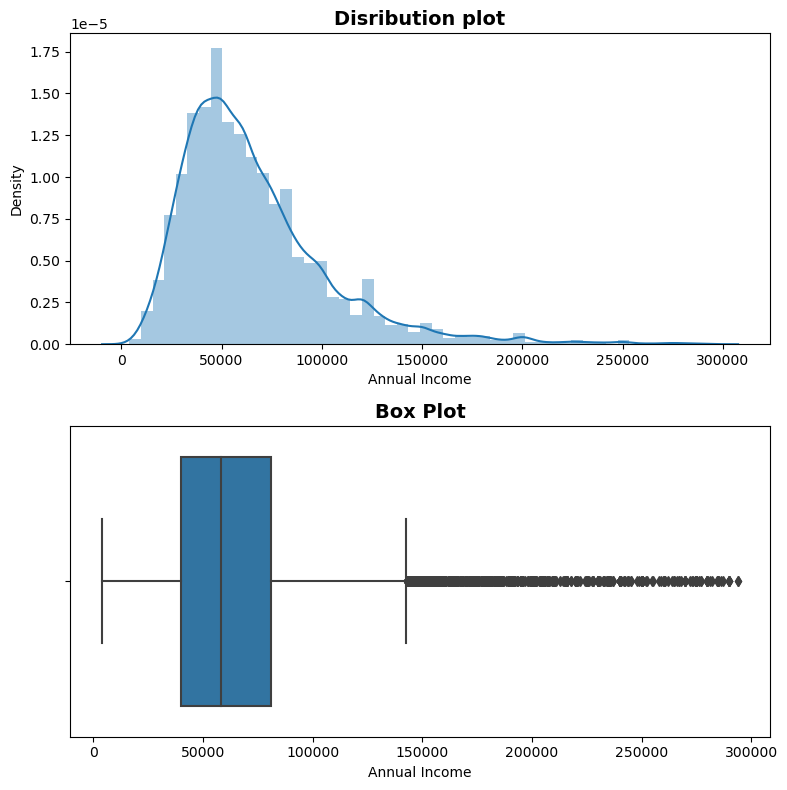

In [145]:
Univeriate_plot(loan, 'annual_inc')

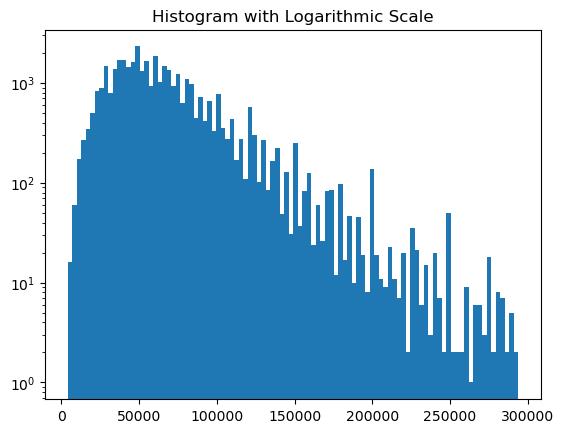

In [146]:
plt.hist(loan["annual_inc"], bins=100, log=True)
plt.title('Histogram with Logarithmic Scale')
plt.show()

In [147]:
loan_Income_above_130k["annual_inc"].describe().apply(lambda x: '{:,.0f}'.format(x) if x > 1 else '{:.10f}'.format(x))

count      2,204
mean     170,263
std       35,437
min      130,008
25%      143,496
50%      159,998
75%      188,253
max      294,000
Name: annual_inc, dtype: object

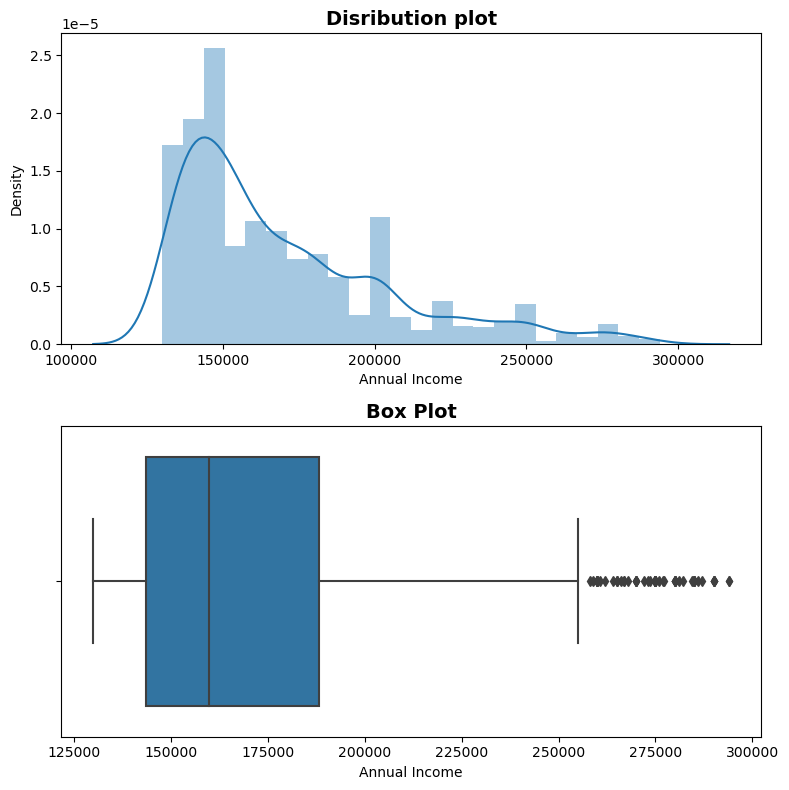

In [148]:
Univeriate_plot(loan_Income_above_130k, 'annual_inc')

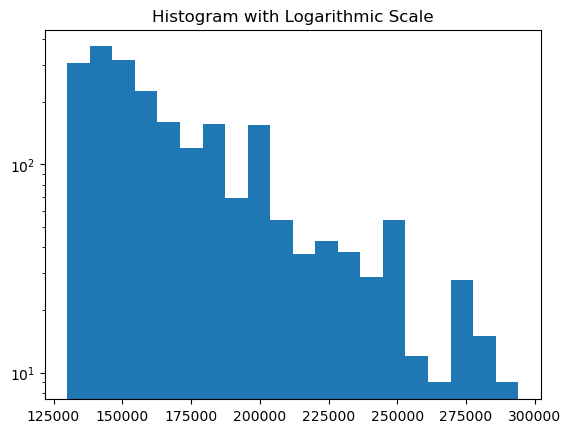

In [149]:
plt.hist(loan_Income_above_130k["annual_inc"], bins=20, log=True)
plt.title('Histogram with Logarithmic Scale')
plt.show()

### <span style="color:purple">**Loan Status : Univeriate analysis**</span>

In [150]:
print(loan["loan_status"].value_counts())

Fully Paid     32756
Charged Off     5603
Name: loan_status, dtype: int64


In [151]:
total_loans = (loan["loan_status"].value_counts()).sum()
total_loans

38359

In [152]:
charged_off_count = loan["loan_status"].value_counts()["Charged Off"]
charged_off_count

5603

In [153]:
<span style="color:#1560bd">**Percentage of Charged off/Defaulters** in total records </span>

SyntaxError: invalid syntax (2671039638.py, line 1)

In [154]:
charged_off_percentage = (charged_off_count / total_loans) * 100
round(charged_off_percentage,2)

14.61

In [155]:
<span style="color:#1560bd">Which means, around **14.61 % are defaulters** in total count.  </span>

SyntaxError: invalid syntax (3898528104.py, line 1)

<Axes: >

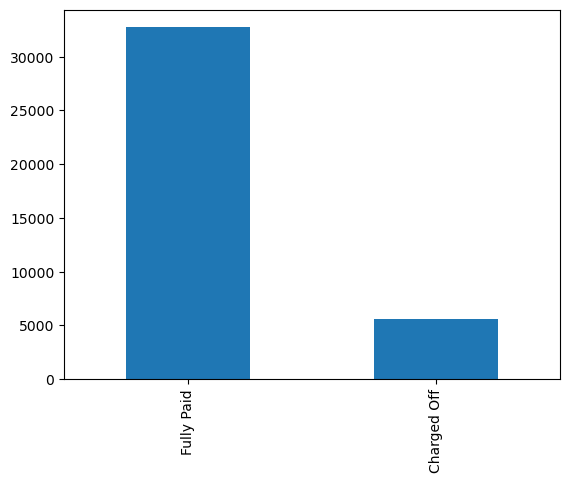

In [156]:
loan["loan_status"].value_counts().plot.bar()

### <span style="color:purple">**Interest Rate: Univeriate analysis**</span>

In [157]:
loan["int_rate"].describe()

count    38359.000000
mean        11.922934
std          3.686594
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

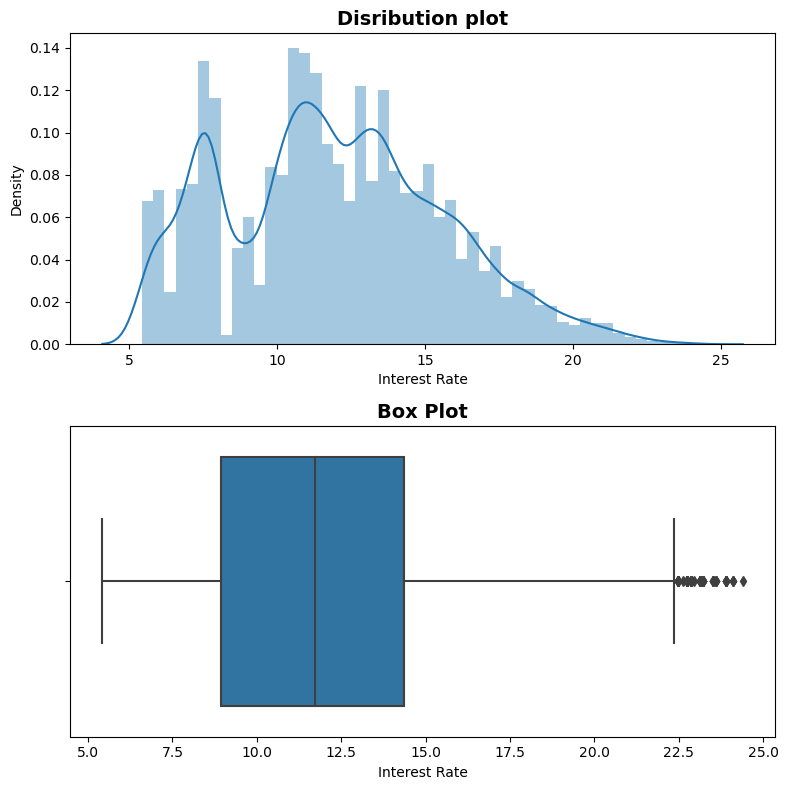

In [158]:
Univeriate_plot(loan, 'int_rate')

### <span style="color:purple">**Home Ownership, Verification Status, Loan Purpose : Univeriate analysis** </span>

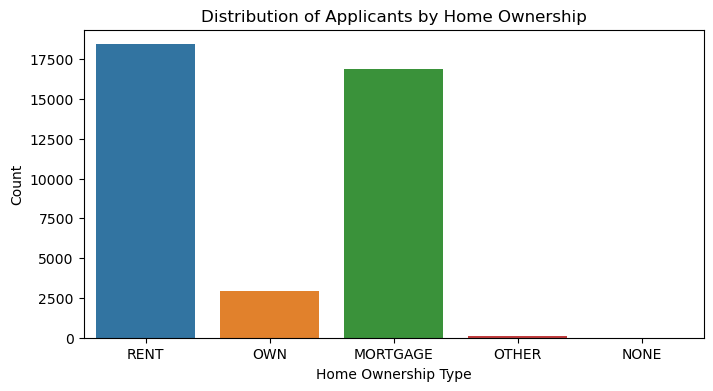

In [159]:
plt.figure(figsize=(8, 4))
sns.countplot(x='home_ownership', data=loan)

plt.title('Distribution of Applicants by Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')

plt.show()

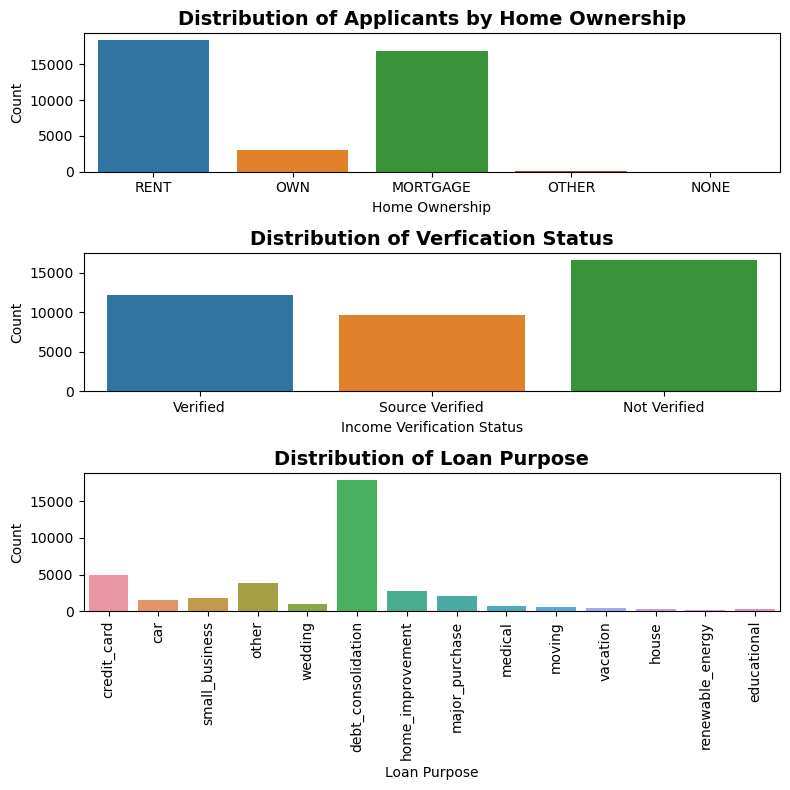

In [160]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot 1
sns.countplot(x='home_ownership', data=loan, ax=axs[0])
axs[0].set_title('Distribution of Applicants by Home Ownership',  fontsize=14, fontweight='bold')
axs[0].set_xlabel(loan_actual_names['home_ownership'])
axs[0].set_ylabel('Count')

# Plot 2 (Example, you can customize as needed)
sns.countplot(x='verification_status', data=loan, ax=axs[1])
axs[1].set_title('Distribution of Verfication Status',  fontsize=14, fontweight='bold')
axs[1].set_xlabel(loan_actual_names['verification_status'])
axs[1].set_ylabel('Count')

# Plot 3 (Example, you can customize as needed)
sns.countplot(x='purpose', data=loan, ax=axs[2])
axs[2].set_title('Distribution of Loan Purpose',  fontsize=14, fontweight='bold')
axs[2].set_xlabel(loan_actual_names['purpose'])
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### <span style="color:purple">**Loan Grade, State, Employment length : Univeriate analysis**</span>

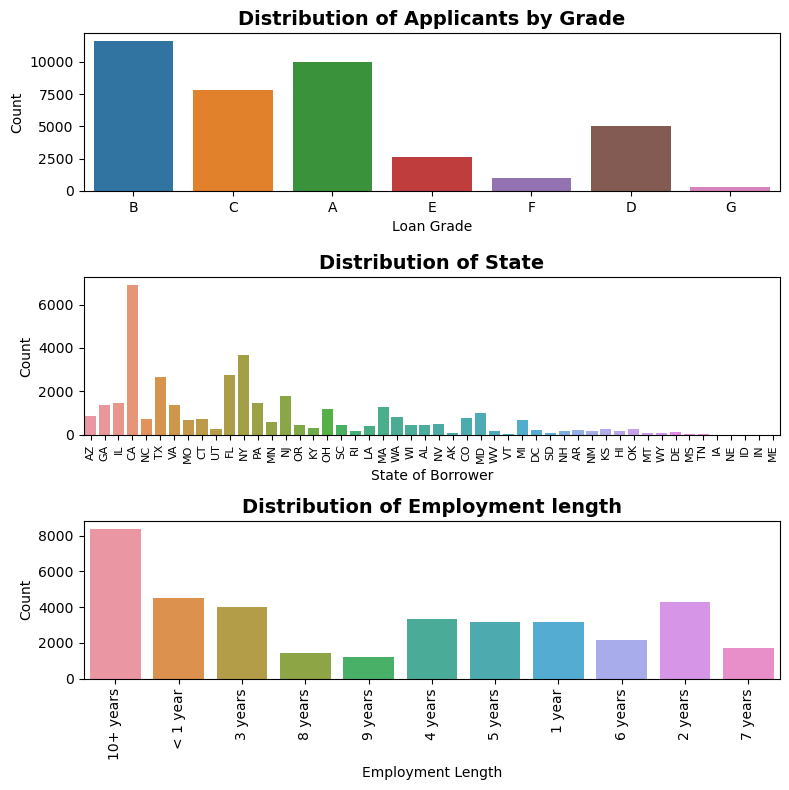

In [161]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot 1
sns.countplot(x='grade', data=loan, ax=axs[0])
axs[0].set_title('Distribution of Applicants by Grade',  fontsize=14, fontweight='bold')
axs[0].set_xlabel(loan_actual_names['grade'])
axs[0].set_ylabel('Count')

# Plot 2 (Example, you can customize as needed)
sns.countplot(x='addr_state', data=loan, ax=axs[1])
#loan['addr_state'].value_counts().plot(kind="pie", ax=axs[1])
axs[1].set_title('Distribution of State',  fontsize=14, fontweight='bold')
axs[1].set_xlabel(loan_actual_names['addr_state'])
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90, labelsize=8)

# Plot 3 (Example, you can customize as needed)
sns.countplot(x='emp_length', data=loan, ax=axs[2])
axs[2].set_title('Distribution of Employment length',  fontsize=14, fontweight='bold')
axs[2].set_xlabel(loan_actual_names['emp_length'])
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### <span style="color:purple">**Loan Month, Year, Term : Univeriate analysis**</span>

In [162]:
loan['term'].value_counts().index.tolist()

[' 36 months', ' 60 months']

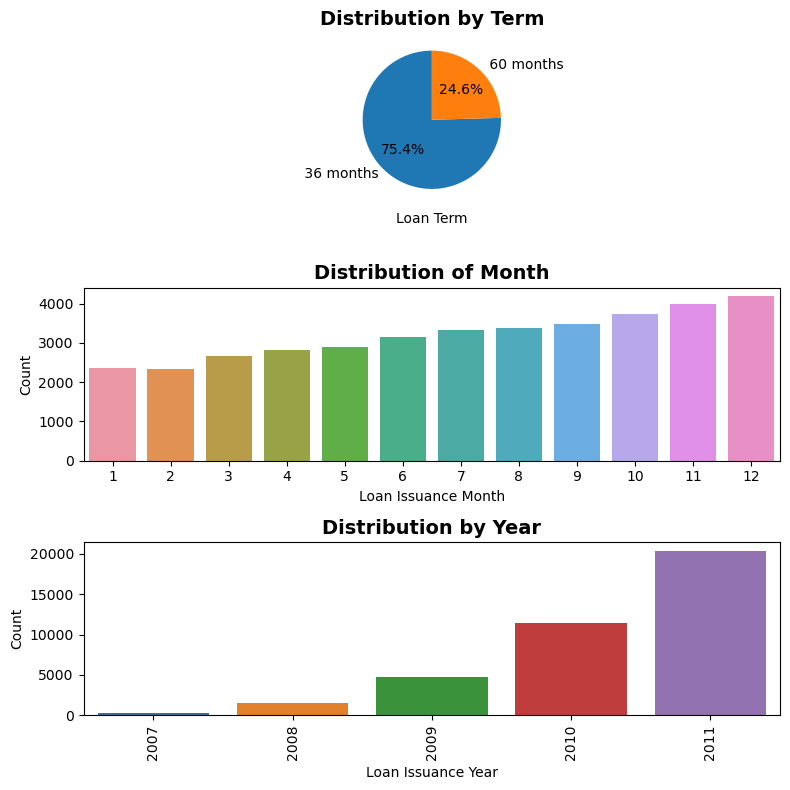

In [163]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot 1
axs[0].pie(loan['term'].value_counts().values.tolist(), labels=loan['term'].value_counts().index.tolist(), autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution by Term',  fontsize=14, fontweight='bold')
axs[0].set_xlabel(loan_actual_names['term'])
axs[0].tick_params( labelsize=12)
#axs[0].set_ylabel('Count')

# Plot 2 (Example, you can customize as needed)
sns.countplot(x='issue_month', data=loan, ax=axs[1])
axs[1].set_title('Distribution of Month',  fontsize=14, fontweight='bold')
axs[1].set_xlabel(loan_actual_names['issue_month'])
axs[1].set_ylabel('Count')
#axs[1].tick_params(axis='x', rotation=90)

# Plot 3 (Example, you can customize as needed)
sns.countplot(x='issue_year', data=loan, ax=axs[2])
axs[2].set_title('Distribution by Year',  fontsize=14, fontweight='bold')
axs[2].set_xlabel(loan_actual_names['issue_year'])
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##  <span style="color:blue"> Bivariate Analysis </span>

In [164]:
def plot_bar(df, col_x, col_y):
    sns.barplot(data = df, x= col_x, y=col_y)
    plt.show()

In [165]:
loan["loan_status"].value_counts()

Fully Paid     32756
Charged Off     5603
Name: loan_status, dtype: int64

In [166]:
chargedOff_loan = loan[loan["loan_status"] == "Charged Off"]
chargedOff_loan.shape

(5603, 40)

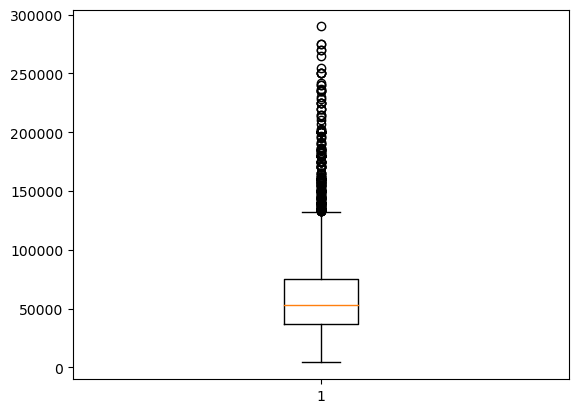

In [167]:
plt.boxplot(chargedOff_loan["annual_inc"])
plt.show()

In [168]:
<span style="color:#1560bd">What does the grades mean:  </span>
<span style="color:#1560bd">- Grade A: High creditworthiness, low risk of default. </span>
<span style="color:#1560bd">- Grade B: Good creditworthiness, moderate risk. </span>
<span style="color:#1560bd">- Grade C: Average creditworthiness, moderate risk. </span>
<span style="color:#1560bd">- Grade D: Below-average creditworthiness, higher risk. </span>
<span style="color:#1560bd">- Grade E, F, G: Lower creditworthiness, higher risk. </span>

SyntaxError: invalid syntax (3092490785.py, line 1)

### <span style="color:purple">**Grade Vs Loan Status**</span>

In [169]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('grade').size() / loan.groupby('grade').size() * 100
charged_off_percentage

grade
A     6.013385
B    12.200998
C    17.238279
D    22.072785
E    26.996198
F    32.746114
G    34.137931
dtype: float64

In [170]:
charged_off_percentage.values

array([ 6.01338528, 12.20099811, 17.23827874, 22.07278481, 26.99619772,
       32.74611399, 34.13793103])

In [171]:
charged_off_percentage.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

In [172]:
grade_order = charged_off_percentage.index.tolist()
grade_order

['A', 'B', 'C', 'D', 'E', 'F', 'G']

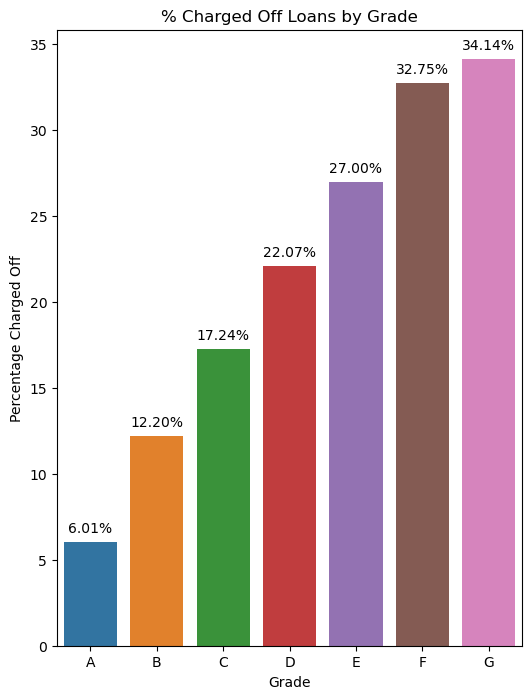

In [173]:
plt.figure(figsize=(6, 8))
barplot =sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values, order=grade_order)
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('% Charged Off Loans by Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage Charged Off')
plt.show()


### <span style="color:purple">**Sub Garde Vs Loan Status**</span>

In [174]:
charged_off_percentage_subgrade = loan[loan['loan_status'] == 'Charged Off'].groupby('sub_grade').size() / loan.groupby('sub_grade').size() * 100
charged_off_percentage_subgrade

sub_grade
A1     2.638522
A2     4.923486
A3     5.712701
A4     6.217255
A5     8.022181
B1     9.491904
B2    11.418511
B3    12.005700
B4    13.509061
B5    13.650307
C1    16.339549
C2    16.710047
C3    18.200271
C4    17.568693
C5    18.134263
D1    18.034557
D2    21.171875
D3    23.014440
D4    23.464912
D5    25.180723
E1    27.615063
E2    26.732673
E3    22.896282
E4    30.000000
E5    28.457447
F1    29.801325
F2    29.741379
F3    29.651163
F4    35.570470
F5    48.181818
G1    33.695652
G2    36.000000
G3    43.181818
G4    23.529412
G5    35.714286
dtype: float64

In [175]:
charged_off_percentage_subgrade.values

array([ 2.63852243,  4.92348636,  5.71270105,  6.21725463,  8.02218115,
        9.49190396, 11.41851107, 12.00570004, 13.50906096, 13.65030675,
       16.33954858, 16.71004685, 18.20027064, 17.56869276, 18.1342633 ,
       18.03455724, 21.171875  , 23.01444043, 23.46491228, 25.18072289,
       27.61506276, 26.73267327, 22.8962818 , 30.        , 28.45744681,
       29.8013245 , 29.74137931, 29.65116279, 35.5704698 , 48.18181818,
       33.69565217, 36.        , 43.18181818, 23.52941176, 35.71428571])

In [176]:
charged_off_percentage_subgrade.index

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object', name='sub_grade')

In [177]:
grade_order = charged_off_percentage_subgrade.index.tolist()
grade_order

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

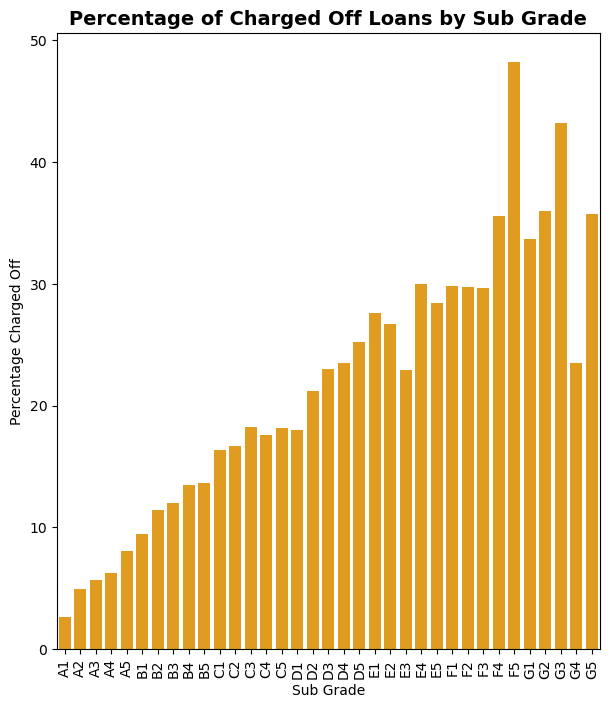

In [178]:
plt.figure(figsize=(7, 8))
barplot =sns.barplot(x=charged_off_percentage_subgrade.index, y=charged_off_percentage_subgrade.values, order=grade_order, color='orange')
plt.title('Percentage of Charged Off Loans by Sub Grade' , fontsize=14, fontweight='bold')
plt.xlabel('Sub Grade')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation='vertical')
plt.show()


In [179]:
pivot_table = (loan[loan['loan_status'] == 'Charged Off']).pivot_table(index='grade', columns='sub_grade', aggfunc='size', fill_value=0)
pivot_table

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
grade,,,,,,,,,,,,,,,,,,,,,
A,30,74,103,178,217,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,170,227,337,328,356,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,...,90,69,51,53,53,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,31,27,19,12,10


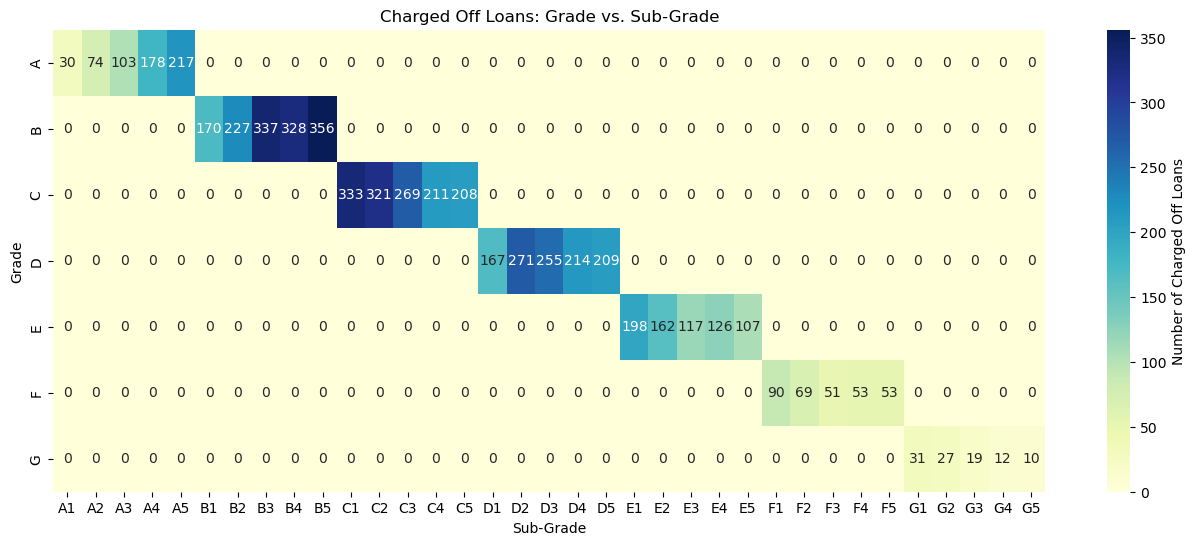

In [180]:
# Create a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Number of Charged Off Loans'})
plt.title('Charged Off Loans: Grade vs. Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Grade')
plt.show()

### <span style="color:purple">**Annual Income Vs Loan Status**</span>

In [181]:
charged_off_percentage_annual_inc_brkt = loan[loan['loan_status'] == 'Charged Off'].groupby('annual_inc_brkt').size() / loan.groupby('annual_inc_brkt').size() * 100
charged_off_percentage_annual_inc_brkt

annual_inc_brkt
4k-1200k       14.607122
1200k-2400k          NaN
2400k-3600k          NaN
3600k-4800k          NaN
4800k-6000k          NaN
dtype: float64

In [182]:
- As all annual income in in between 4k-1200K. Lets devide again into brackets. 


SyntaxError: invalid decimal literal (1125794813.py, line 1)

In [183]:
num_bins = 7 
print("Min value : ", loan["annual_inc"].min())
print("Max value : ", loan["annual_inc"].max())

# Plan the bucket Edges
bin_e = np.linspace(loan["annual_inc"].min(), loan["annual_inc"].max(), num_bins + 1)
# bin_edges_ai -> array([4.0000e+03, 1.2032e+06, 2.4024e+06, 3.6016e+06, 4.8008e+06,6.0000e+06])

formatted_bin_edges = [f"{int(val/1000)}k" for val in bin_e]
formatted_bin_edges

Min value :  4000.0
Max value :  294000.0


['4k', '45k', '86k', '128k', '169k', '211k', '252k', '294k']

In [184]:
bin_edges_ai = [4000, 45000, 85000, 130000, 170000, 210000, 250000, 300000] # CLosest round off
bin_labels_ai = ['4k-45k', '45k-85k', '85k-130k', '130k-170k', '170k-210k', '210k-250k', '250k-300k']
loan['annual_inc_brkt'] = pd.cut(loan['annual_inc'], bins=bin_edges_ai, labels=bin_labels_ai)
loan.loc[:, ["annual_inc", "annual_inc_brkt"]]

,annual_inc,annual_inc_brkt
0,24000.0,4k-45k
1,30000.0,4k-45k
2,12252.0,4k-45k
3,49200.0,45k-85k
5,36000.0,4k-45k
...,...,...
39712,110000.0,85k-130k
39713,18000.0,4k-45k
39714,100000.0,85k-130k
39715,200000.0,170k-210k


In [185]:
charged_off_percentage_annual_inc_brkt = loan[loan['loan_status'] == 'Charged Off'].groupby('annual_inc_brkt').size() / loan.groupby('annual_inc_brkt').size() * 100
charged_off_percentage_annual_inc_brkt

annual_inc_brkt
4k-45k       17.439240
45k-85k      14.227063
85k-130k     11.258278
130k-170k    11.265545
170k-210k    10.498221
210k-250k    12.000000
250k-300k     9.333333
dtype: float64

In [186]:
charged_off_percentage_annual_inc_brkt.values

array([17.4392403 , 14.22706278, 11.25827815, 11.26554499, 10.49822064,
       12.        ,  9.33333333])

In [187]:
grade_order = charged_off_percentage_annual_inc_brkt.index.tolist()
grade_order

['4k-45k',
 '45k-85k',
 '85k-130k',
 '130k-170k',
 '170k-210k',
 '210k-250k',
 '250k-300k']

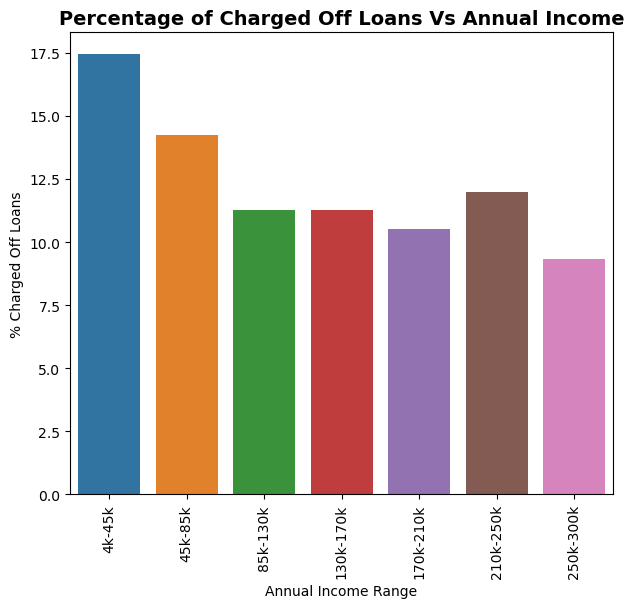

In [188]:
plt.figure(figsize=(7, 6))
barplot =sns.barplot(x=charged_off_percentage_annual_inc_brkt.index, y=charged_off_percentage_annual_inc_brkt.values, order=grade_order)
plt.title('Percentage of Charged Off Loans Vs Annual Income' , fontsize=14, fontweight='bold')
plt.xlabel('Annual Income Range')
plt.ylabel('% Charged Off Loans')
plt.xticks(rotation='vertical')
plt.show()


### <span style="color:purple">**Purpose Vs Loan Status**</span>

In [189]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('purpose').size() / loan.groupby('purpose').size() * 100
charged_off_percentage

purpose
car                   10.688043
credit_card           10.804873
debt_consolidation    15.354659
educational           17.283951
home_improvement      12.075071
house                 16.343490
major_purchase        10.285180
medical               15.657312
moving                15.936953
other                 16.367888
renewable_energy      19.000000
small_business        27.168294
vacation              14.133333
wedding               10.228509
dtype: float64

In [190]:
purpose_list = charged_off_percentage.index.tolist()
purpose_list

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

In [191]:
purpose_chargedOffs = charged_off_percentage.values.tolist()
purpose_chargedOffs

[10.68804275217101,
 10.804873177551428,
 15.354659248956883,
 17.28395061728395,
 12.075070821529744,
 16.343490304709142,
 10.285179990649837,
 15.657311669128507,
 15.936952714535902,
 16.36788776305534,
 19.0,
 27.168294083859852,
 14.133333333333335,
 10.228509249183896]

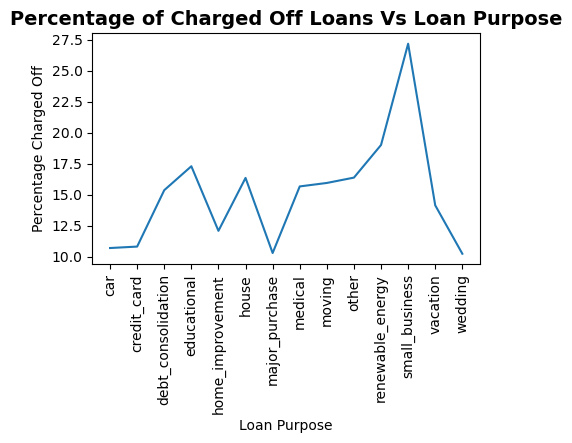

In [192]:
plt.figure(figsize=(5, 3))
plt.plot(purpose_list, purpose_chargedOffs)
plt.title('Percentage of Charged Off Loans Vs Loan Purpose' , fontsize=14, fontweight='bold')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation='vertical')
plt.show()

In [193]:
charged_off_percentage_ho = loan[loan['loan_status'] == 'Charged Off'].groupby('home_ownership').size() / loan.groupby('home_ownership').size() * 100
charged_off_percentage_ho

home_ownership
MORTGAGE    13.715031
NONE              NaN
OTHER       18.556701
OWN         14.879946
RENT        15.360825
dtype: float64

In [194]:
ho_ChargedOff_vlues = charged_off_percentage_ho.values.tolist()
ho_ChargedOff_vlues

[13.715030820293977,
 nan,
 18.556701030927837,
 14.87994589110585,
 15.360824742268042]

In [195]:
ho_list = charged_off_percentage_ho.index.tolist()
ho_list

['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

In [196]:
### <span style="color:purple">**Home Ownership & Purpose Together Vs Loan Status**</span>

Text(0, 0.5, 'Percentage Charged Off')

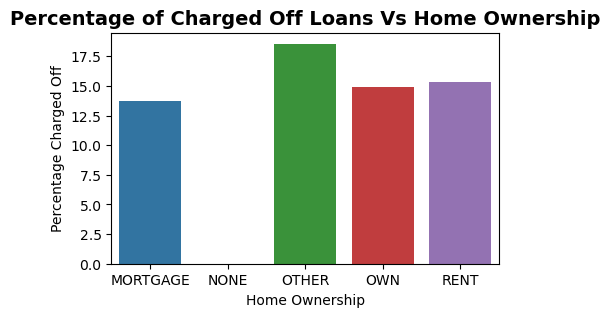

In [197]:
plt.figure(figsize=(5, 3))
# Plot 1
sns.barplot(x=ho_list, y=ho_ChargedOff_vlues, order=ho_list)
plt.title('Percentage of Charged Off Loans Vs Home Ownership' , fontsize=14, fontweight='bold')
plt.xlabel('Home Ownership')
plt.ylabel('Percentage Charged Off')



### <span style="color:purple">**Interest Rate Vs Loan status**</span>

In [198]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('int_rate_brkt').size() / loan.groupby('int_rate_brkt').size() * 100
charged_off_percentage

int_rate_brkt
5-10      6.747066
10-13    13.613286
13-16    17.997368
16-20    27.415144
20-25    38.829787
dtype: float64

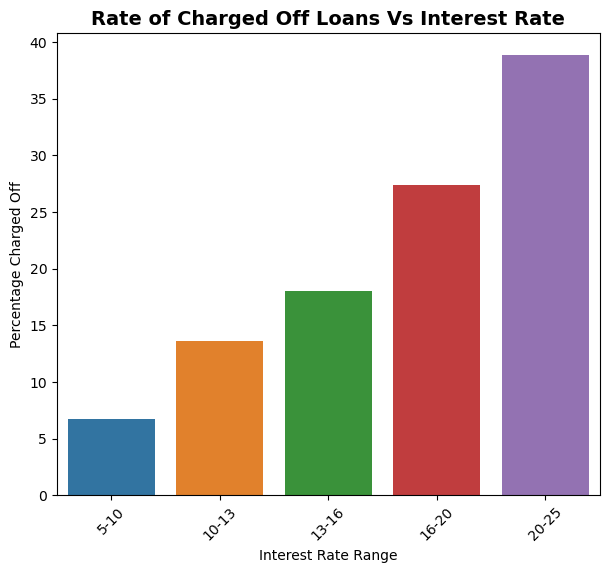

In [199]:
plt.figure(figsize=(7, 6))
barplot =sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values, order=charged_off_percentage.index.tolist())
plt.title('Rate of Charged Off Loans Vs Interest Rate' , fontsize=14, fontweight='bold')
plt.xlabel('Interest Rate Range')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation=45)
plt.show()


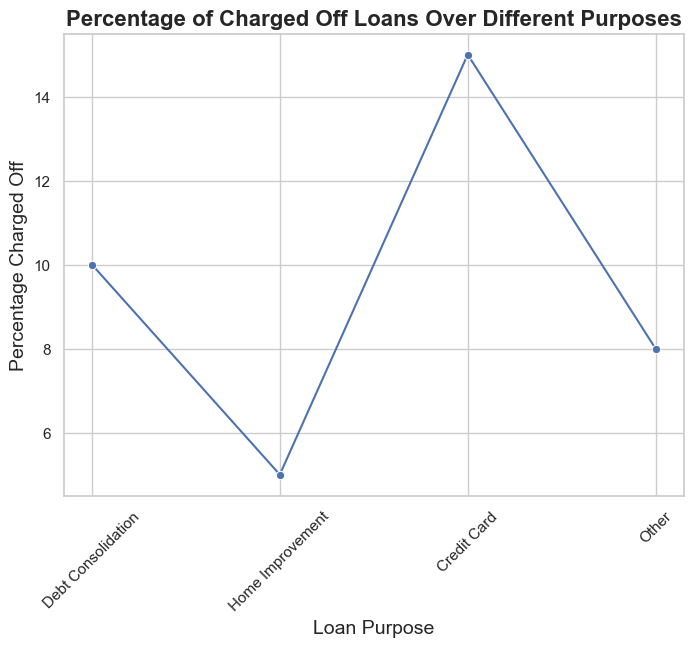

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
purpose_list = ['Debt Consolidation', 'Home Improvement', 'Credit Card', 'Other']
purpose_chargedOffs = [10, 5, 15, 8]  # Replace with your actual data

# Create a DataFrame
df = pd.DataFrame({'Purpose': purpose_list, 'Percentage Charged Off': purpose_chargedOffs})

# Set the style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x='Purpose', y='Percentage Charged Off', data=df, marker='o', color='b')

# Customize the plot
plt.title('Percentage of Charged Off Loans Over Different Purposes', fontsize=16, fontweight='bold')
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Percentage Charged Off', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


### <span style="color:purple">**DTI Vs Charged Off**</span>

In [201]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('dti_brkt').size() / loan.groupby('dti_brkt').size() * 100
charged_off_percentage

dti_brkt
0-6      11.996727
6-12     13.302572
12-18    15.250795
18-24    16.839145
24-30    15.720263
dtype: float64

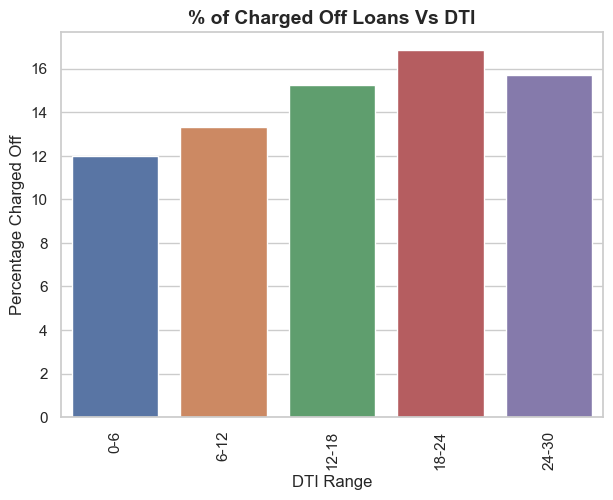

In [202]:
plt.figure(figsize=(7, 5))
barplot =sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values, order=charged_off_percentage.index.tolist())
plt.title('% of Charged Off Loans Vs DTI' , fontsize=14, fontweight='bold')
plt.xlabel('DTI Range')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation='vertical')
plt.show()


In [203]:
loan["verification_status"].value_counts()

Not Verified       16633
Verified           12121
Source Verified     9605
Name: verification_status, dtype: int64

### <span style="color:purple">**Rate of Charged Off Loans Vs Verification Status**</span>

In [204]:
charged_off_percentage_annual_vs = loan[loan['loan_status'] == 'Charged Off'].groupby('verification_status').size() / loan.groupby('verification_status').size() * 100
charged_off_percentage_annual_vs


verification_status
Not Verified       12.835929
Source Verified    14.846434
Verified           16.846795
dtype: float64

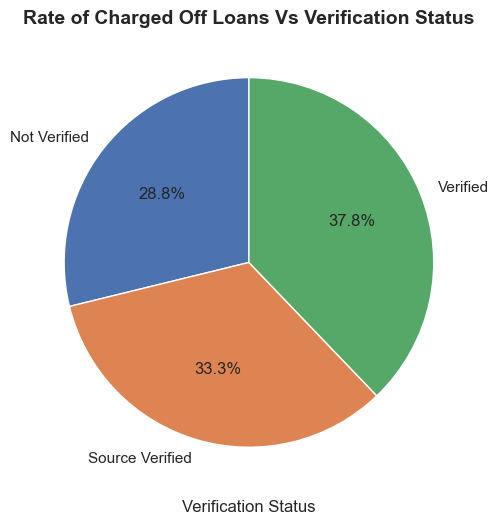

In [205]:
plt.figure(figsize=(7, 6))
#barplot =sns.barplot(x=charged_off_percentage_annual_vs.index, y=charged_off_percentage_annual_vs.values, order=charged_off_percentage_annual_vs.index.tolist(), color='yellow')
plt.pie(charged_off_percentage_annual_vs.values.tolist(), labels=charged_off_percentage_annual_vs.index.tolist(), autopct='%1.1f%%', startangle=90)
plt.title('Rate of Charged Off Loans Vs Verification Status' , fontsize=14, fontweight='bold')
plt.xlabel('Verification Status')
plt.xticks(rotation='vertical')
plt.show()


In [206]:
### <span style="color:purple">**Charged off vs Number of Public Record Bankruptcies**</span>

In [207]:
loan["pub_rec_bankruptcies"].value_counts()

0.0    36030
1.0     1633
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [208]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('pub_rec_bankruptcies').size() / loan.groupby('pub_rec_bankruptcies').size() * 100
charged_off_percentage

pub_rec_bankruptcies
0.0    14.207605
1.0    22.351500
2.0    40.000000
dtype: float64

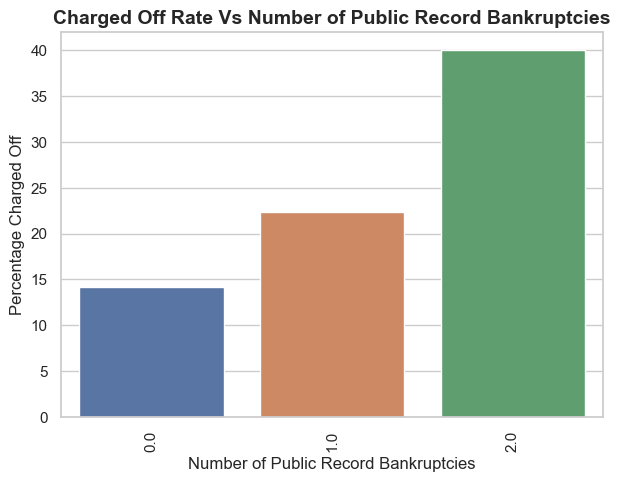

In [209]:
plt.figure(figsize=(7, 5))
barplot =sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values, order=charged_off_percentage.index.tolist())
plt.title('Charged Off Rate Vs Number of Public Record Bankruptcies' , fontsize=14, fontweight='bold')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation='vertical')
plt.show()


In [210]:
charged_off_percentage = loan[loan['loan_status'] == 'Charged Off'].groupby('addr_state').size() / loan.groupby('addr_state').size() * 100
charged_off_percentage

addr_state
AK    18.181818
AL    12.500000
AR    11.489362
AZ    14.472123
CA    16.206448
CO    12.894737
CT    13.091922
DC     7.109005
DE    10.619469
FL    18.066618
GA    15.914138
HI    16.867470
IA          NaN
ID    16.666667
IL    13.447099
IN          NaN
KS    12.156863
KY    14.469453
LA    12.589074
MA    12.198912
MD    15.877712
ME          NaN
MI    14.592275
MN    13.388430
MO    17.117117
MS    10.526316
MT    13.253012
NC    15.281501
NE    60.000000
NH    15.060241
NJ    15.661972
NM    16.574586
NV    22.478992
NY    13.395045
OH    13.021277
OK    13.937282
OR    16.321839
PA    12.226776
RI    13.020833
SC    14.442013
SD    19.354839
TN    11.764706
TX    11.884936
UT    15.936255
VA    12.995595
VT    11.320755
WA    15.563725
WI    14.350797
WV    12.209302
WY     5.000000
dtype: float64

<Figure size 1000x500 with 0 Axes>

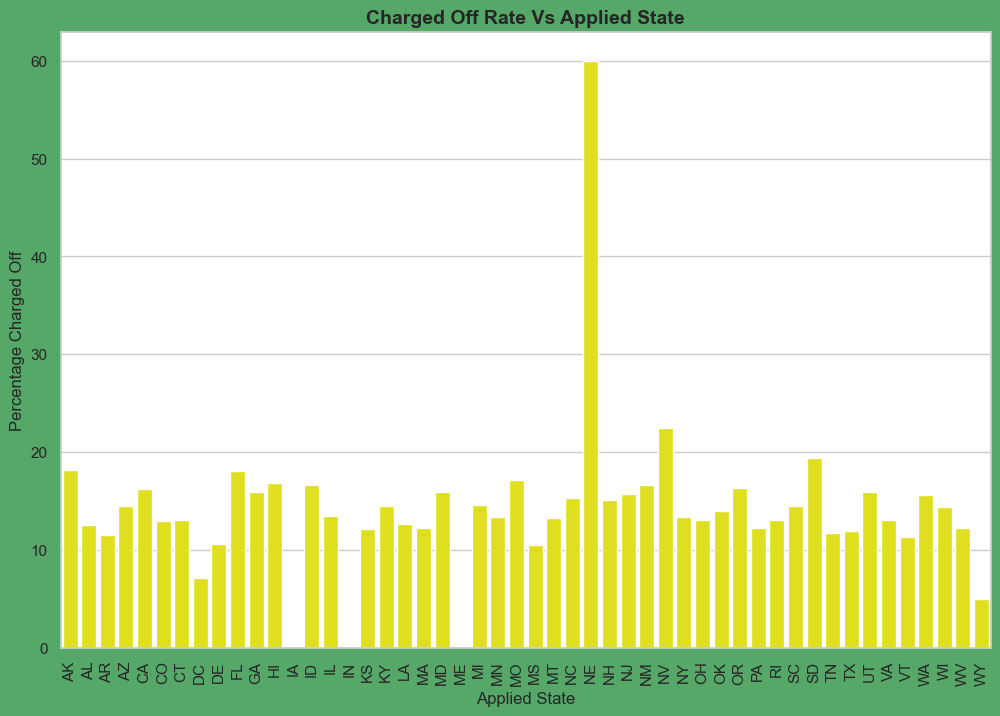

In [211]:
plt.figure(figsize=(10, 5))
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='g')
barplot =sns.barplot(x=charged_off_percentage.index, y=charged_off_percentage.values, order=charged_off_percentage.index.tolist(), color='yellow')
plt.title('Charged Off Rate Vs Applied State' , fontsize=14, fontweight='bold')
plt.xlabel('Applied State')
plt.ylabel('Percentage Charged Off')
plt.xticks(rotation='vertical')
plt.show()


In [212]:
charged_off_percentage_annual_la = loan[loan['loan_status'] == 'Charged Off'].groupby('loan_amnt_brkt').size() / loan.groupby('loan_amnt_brkt').size() * 100
charged_off_percentage_annual_la


loan_amnt_brkt
500-7.5K    13.123978
7.5k-15k    13.693743
15k-22k     17.675643
22k-28k     19.177524
28k-35k     23.406193
dtype: float64

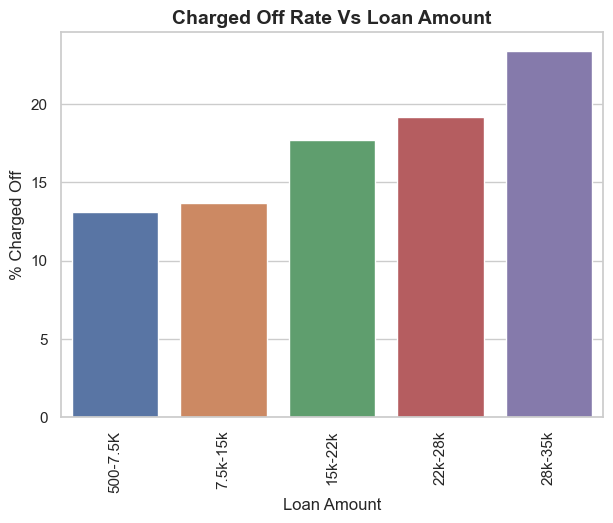

In [213]:
plt.figure(figsize=(7, 5))
barplot =sns.barplot(x=charged_off_percentage_annual_la.index, y=charged_off_percentage_annual_la.values, order=charged_off_percentage_annual_la.index.tolist())
plt.title('Charged Off Rate Vs Loan Amount' , fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount')
plt.ylabel('% Charged Off')
plt.xticks(rotation='vertical')
plt.show()


### <span style="color:purple">**Revolving utilization Vs Charged Off rate**</span>

In [214]:
df_chargedoff = loan[loan["loan_status"] == "Charged Off"]
min_value = df_chargedoff['revol_util'].min()
max_value = df_chargedoff['revol_util'].max()

num_bins = 10
bins = np.linspace(min_value, max_value, num_bins + 1)
bins


array([ 0.  ,  9.99, 19.98, 29.97, 39.96, 49.95, 59.94, 69.93, 79.92,
       89.91, 99.9 ])

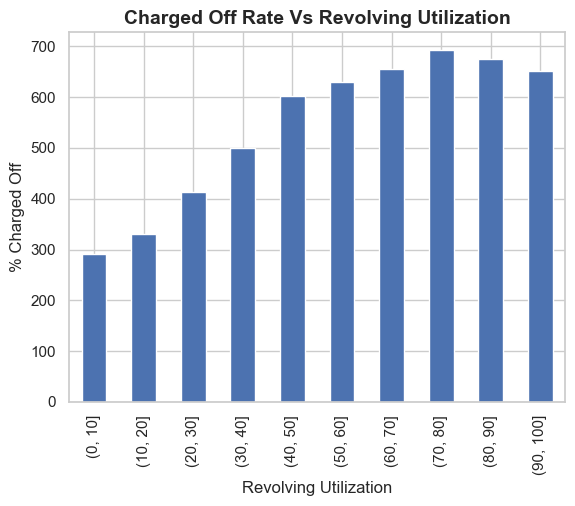

In [215]:
custom_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
loan['bins'] = pd.cut(df_chargedoff['revol_util'], custom_bins)
loan['bins'].value_counts(sort=False).plot(kind='bar')
plt.title('Charged Off Rate Vs Revolving Utilization' , fontsize=14, fontweight='bold')
plt.xlabel('Revolving Utilization')
plt.ylabel('% Charged Off')
plt.xticks(rotation='vertical')
plt.show()

In [216]:
### <span style="color:purple">**Correlation:**</span>

<Figure size 500x400 with 0 Axes>

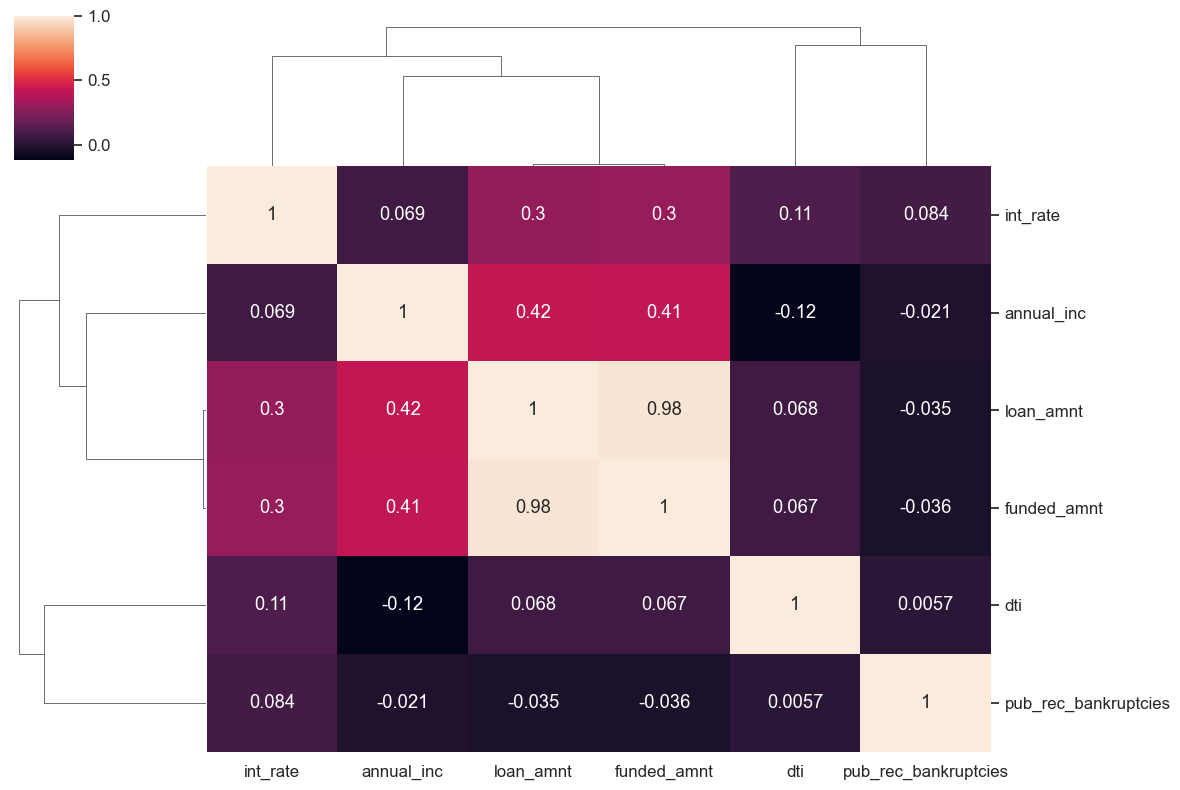

In [222]:
plt.figure(figsize=(5, 4))
corr_loan = loan.loc[:,["annual_inc", "loan_amnt", "funded_amnt", "dti", "int_rate", "pub_rec_bankruptcies"]]
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8))
plt.show()

In [218]:
corr

,annual_inc,loan_amnt,funded_amnt,dti,int_rate,pub_rec_bankruptcies
annual_inc,1.000000,0.416429,0.412350,-0.116764,0.069421,-0.020933
loan_amnt,0.416429,1.000000,0.981854,0.067800,0.299507,-0.034957
funded_amnt,0.412350,0.981854,1.000000,0.067302,0.303627,-0.035903
dti,-0.116764,0.067800,0.067302,1.000000,0.113299,0.005651
int_rate,0.069421,0.299507,0.303627,0.113299,1.000000,0.083810
pub_rec_bankruptcies,-0.020933,-0.034957,-0.035903,0.005651,0.083810,1.000000


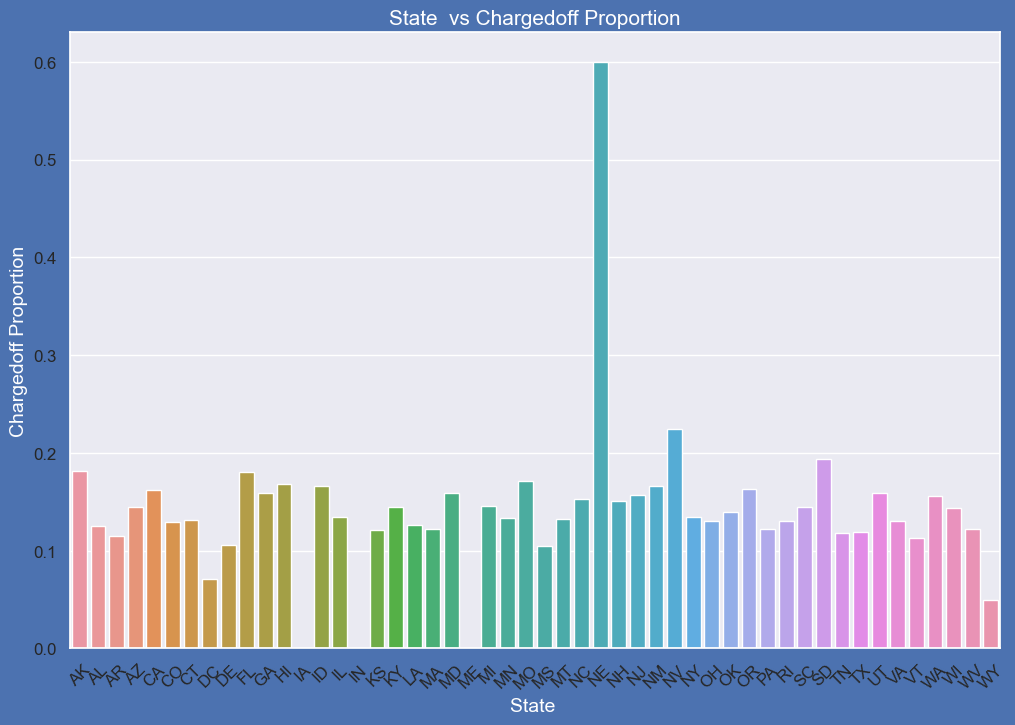

In [219]:

addr_state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

##  <span style="color:blue"> Conclusion: </span>

- <span style="color:#1560bd"> **Higher loan amounts, particularly in the range of $15,000 to $35,000, correlate with an increased likelihood of default.**</span>
- <span style="color:#1560bd"> **Higher loan amount tend to increase the risk of defaulting.**</span>
- <span style="color:#1560bd"> **Annual incomes falling between $4,000 and $45,000 are associated with a higher risk of default, indicating a connection between lower income levels and repayment challenges.**</span>
- <span style="color:#1560bd"> **Loans for small businesses and renewable energy purposes demonstrate a higher tendency to default, possibly due to increased business risks.**</span>
- <span style="color:#1560bd"> **Applicants without property ownership, such as a house, exhibit a higher likelihood of becoming defaulters.**</span>
- <span style="color:#1560bd"> **Debt-to-Income Ratio (DTI), especially in range of 24-30, significantly raises the chances of loan default, emphasizing the importance of evaluating an applicant's debt burden.**</span>
- <span style="color:#1560bd"> **Credit grades F & G showcase higher default rates, warranting careful scrutiny and cautious approval for applicants in these categories. To be more specific, sub grade type F5 and G3 are very chance of being defaulters.**</span> 
- <span style="color:#1560bd"> **A history of public bankruptcies increases the risk of default, emphasizing the need for thorough evaluation before approving loans for individuals with such backgrounds.**</span>


**************************************************** End ****************************************************